In [20]:
# Logbook for different theta values and rejection rates
import numpy as np
tot_reqs = 10774
REJ_LAYERS = 2 # number of layers of rejected rate to consider

In [39]:
exp_no = 0
theta = 0
rejected_num = np.mean([3775])
rej_rate = rejected_num/tot_reqs
rej_rate

0.350380545758307

In [40]:
exp_no = 9
theta = 0.25
rejected_num = np.mean([3677])
rej_rate = rejected_num/tot_reqs
rej_rate

0.3412845739743828

In [41]:
exp_no = 10
theta = 0.5
rejected_num = np.mean([3760])
rej_rate = rejected_num/tot_reqs
rej_rate

0.34898830517913493

In [42]:
exp_no = 11
theta = 0.75
rejected_num = np.mean([3732])
rej_rate = rejected_num/tot_reqs
rej_rate

0.34638945609801375

In [31]:
exp_no = 1
theta = 1.0
rejected_num = np.mean([3590,3643,3644])
rej_rate = rejected_num/tot_reqs
rej_rate

0.3365200173256605

In [35]:
exp_no = 7
theta = 1.25
rejected_num = np.mean([3646,3706])
rej_rate = rejected_num/tot_reqs
rej_rate

0.3411917579357713

In [33]:
exp_no = 6
theta = 1.5
rejected_num = np.mean([3705,3853,3780])
rej_rate = rejected_num/tot_reqs
rej_rate

0.3507827485922901

In [36]:
exp_no = 8
theta = 1.75
rejected_num = np.mean([3667,3627])
rej_rate = rejected_num/tot_reqs
rej_rate

0.3385000928160386

In [29]:
exp_no = 2
theta = 2.0
rejected_num = np.mean([3535,3651,3670])
rej_rate = rejected_num/tot_reqs
rej_rate

0.33587030505538024

In [24]:
exp_no = 5
theta = 2.5
rejected_num = 3704
rej_rate = rejected_num/tot_reqs
rej_rate

0.3437906070168925

In [25]:
exp_no = 3
theta = 3.0
rejected_num = 3766
rej_rate = rejected_num/tot_reqs
rej_rate

0.3495452014108038

In [26]:
exp_no = 4
theta = 4.0
rejected_num = 3821
rej_rate = rejected_num/tot_reqs
rej_rate

0.3546500835344347

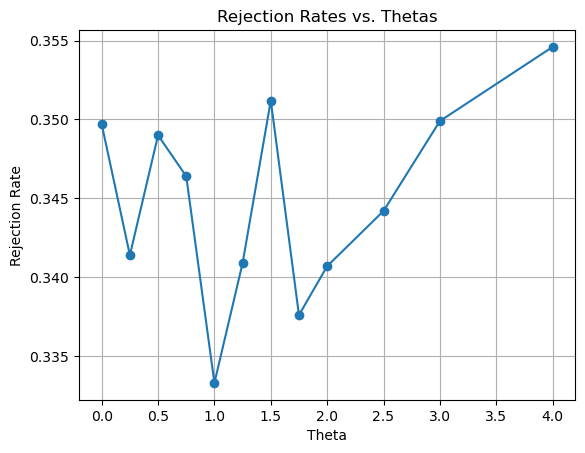

In [43]:
import matplotlib.pyplot as plt

# Data
theta_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 4.0]
rej_rate_list = [0.3497, 0.3414, 0.3490, 0.3464, 0.3333, 0.3409, 0.3512, 0.3376, 0.3407, 0.3442, 0.3499, 0.3546]

# Plot
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
plt.grid(True)
plt.show()
